#Mount Drive

In [1]:
#mount google drive
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/My\ Drive/Colab Notebooks/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Colab Notebooks


# Load Data

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('phl_exoplanet_catalog_2019.csv')

In [4]:
df.head()

,P_NAME,P_STATUS,P_MASS,P_MASS_ERROR_MIN,P_MASS_ERROR_MAX,P_RADIUS,P_RADIUS_ERROR_MIN,P_RADIUS_ERROR_MAX,P_YEAR,P_UPDATED,...,P_HABZONE_CON,P_TYPE_TEMP,P_HABITABLE,P_ESI,S_CONSTELLATION,S_CONSTELLATION_ABR,S_CONSTELLATION_ENG,P_RADIUS_EST,P_MASS_EST,P_SEMI_MAJOR_AXIS_EST
0,11 Com b,3.0,6165.86330,-476.74200,476.74200,NaN,NaN,NaN,2007,2014-05-14,...,0,Hot,0,0.083813,Coma Berenices,Com,Berenice's Hair,12.082709,6165.86330,1.29
1,11 UMi b,3.0,4684.78480,-794.57001,794.57001,NaN,NaN,NaN,2009,2018-09-06,...,0,Hot,0,0.082414,Ursa Minor,UMi,Little Bear,12.229641,4684.78480,1.53
2,14 And b,3.0,1525.57440,NaN,NaN,NaN,NaN,NaN,2008,2014-05-14,...,0,Hot,0,0.081917,Andromeda,And,Andromeda,12.848516,1525.57440,0.83
3,14 Her b,3.0,1481.07850,-47.67420,47.67420,NaN,NaN,NaN,2002,2018-09-06,...,0,Cold,0,0.145241,Hercules,Her,Hercules,12.865261,1481.07850,2.93
4,16 Cyg B b,3.0,565.73385,-25.42624,25.42624,NaN,NaN,NaN,1996,2018-09-06,...,1,Warm,0,0.368627,Cygnus,Cyg,Swan,13.421749,565.73385,1.66


# EDA

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4048 entries, 0 to 4047
Columns: 112 entries, P_NAME to P_SEMI_MAJOR_AXIS_EST
dtypes: float64(94), int64(4), object(14)
memory usage: 3.5+ MB


In [7]:
df.head()

,P_NAME,P_STATUS,P_MASS,P_MASS_ERROR_MIN,P_MASS_ERROR_MAX,P_RADIUS,P_RADIUS_ERROR_MIN,P_RADIUS_ERROR_MAX,P_YEAR,P_UPDATED,...,P_HABZONE_CON,P_TYPE_TEMP,P_HABITABLE,P_ESI,S_CONSTELLATION,S_CONSTELLATION_ABR,S_CONSTELLATION_ENG,P_RADIUS_EST,P_MASS_EST,P_SEMI_MAJOR_AXIS_EST
0,11 Com b,3.0,6165.86330,-476.74200,476.74200,NaN,NaN,NaN,2007,2014-05-14,...,0,Hot,0,0.083813,Coma Berenices,Com,Berenice's Hair,12.082709,6165.86330,1.29
1,11 UMi b,3.0,4684.78480,-794.57001,794.57001,NaN,NaN,NaN,2009,2018-09-06,...,0,Hot,0,0.082414,Ursa Minor,UMi,Little Bear,12.229641,4684.78480,1.53
2,14 And b,3.0,1525.57440,NaN,NaN,NaN,NaN,NaN,2008,2014-05-14,...,0,Hot,0,0.081917,Andromeda,And,Andromeda,12.848516,1525.57440,0.83
3,14 Her b,3.0,1481.07850,-47.67420,47.67420,NaN,NaN,NaN,2002,2018-09-06,...,0,Cold,0,0.145241,Hercules,Her,Hercules,12.865261,1481.07850,2.93
4,16 Cyg B b,3.0,565.73385,-25.42624,25.42624,NaN,NaN,NaN,1996,2018-09-06,...,1,Warm,0,0.368627,Cygnus,Cyg,Swan,13.421749,565.73385,1.66


Plot Target Distribution

<Axes: title={'center': 'Target Counts'}>

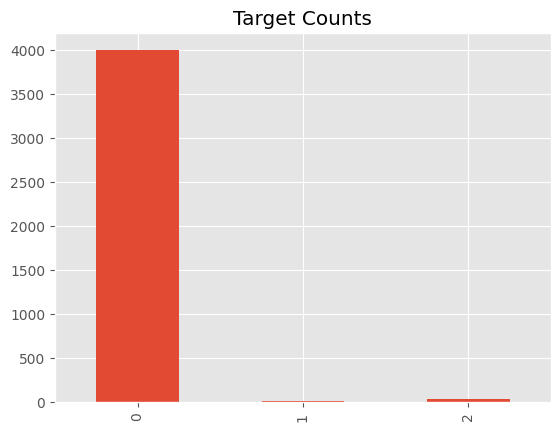

In [8]:
df['P_HABITABLE'].value_counts(sort=False).sort_index().plot(kind='bar', title='Target Counts')

In [9]:
df['P_HABITABLE'].value_counts()

0    3993
2      34
1      21
Name: P_HABITABLE, dtype: int64

#Data Cleaning and Preprocessing

Impute non numeric missing values, drop columns containing many na's

In [10]:
#Calculate the total number of examples
count = df.isnull().sum().sort_values(ascending=False)

#Return the fraction of a column which is filled with missing values
percent = ((df.isnull().sum()/df.isnull().count())*100).sort_values(ascending=False)

#Merge count and percent to display
missing = pd.concat([count, percent], axis = 1, keys = ['Count', '%'])

missing.head()

,Count,%
P_DETECTION_MASS,4048,100.0
P_GEO_ALBEDO,4048,100.0
S_MAGNETIC_FIELD,4048,100.0
S_DISC,4048,100.0
P_ATMOSPHERE,4048,100.0


In [11]:
missing = missing.T
df = df.drop(columns=[col for col in df.columns if missing[col]['%']>=40 ], axis=1)

impute missing values in categorical columns

In [12]:
categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
  df[col] = df[col].fillna(df[col].mode()[0])

convert ordinal categorical columns to numeric

[field descriptions](https://phl.upr.edu/projects/habitable-exoplanets-catalog/hec-data-of-potentially-habitable-worlds/phls-exoplanets-catalog)

In [13]:
categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols]

,P_NAME,P_UPDATED,P_DETECTION,S_NAME,S_ALT_NAMES,P_TYPE,S_TYPE_TEMP,S_RA_T,S_DEC_T,P_TYPE_TEMP,S_CONSTELLATION,S_CONSTELLATION_ABR,S_CONSTELLATION_ENG
0,11 Com b,2014-05-14,Radial Velocity,11 Com,"HD 107383, HIP 60202",Jovian,K,12 20 43.0286,+17 47 34.3248,Hot,Coma Berenices,Com,Berenice's Hair
1,11 UMi b,2018-09-06,Radial Velocity,11 UMi,"HD 136726, HIP 74793",Jovian,K,15 17 05.8915,+71 49 26.0328,Hot,Ursa Minor,UMi,Little Bear
2,14 And b,2014-05-14,Radial Velocity,14 And,"HD 221345, HIP 116076",Jovian,G,23 31 17.4215,+39 14 10.3128,Hot,Andromeda,And,Andromeda
3,14 Her b,2018-09-06,Radial Velocity,14 Her,"HD 145675, HIP 79248",Jovian,K,16 10 24.3158,+43 49 03.5256,Cold,Hercules,Her,Hercules
4,16 Cyg B b,2018-09-06,Radial Velocity,16 Cyg B,"HD 186427, HIP 96901",Jovian,G,19 41 51.9764,+50 31 03.0900,Warm,Cygnus,Cyg,Swan
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4043,K2-296 b,5/23/19,Transit,K2-296,0.00000,Superterran,M,11 58 49.4230,-03 23 21.7997,Warm,Virgo,Vir,Virgin
4044,K2-296 c,5/23/19,Transit,K2-296,0.00000,Neptunian,M,11 58 49.4230,-03 23 21.7997,Hot,Virgo,Vir,Virgin
4045,GJ 1061 b,9/3/19,Radial Velocity,GJ 1061,0.00000,Terran,M,03 35 59.7004,-44 30 45.7308,Hot,Horologium,Hor,Pendulum Clock
4046,GJ 1061 c,9/3/19,Radial Velocity,GJ 1061,0.00000,Terran,M,03 35 59.7004,-44 30 45.7308,Warm,Horologium,Hor,Pendulum Clock


convert ordinal categorical columns to numeric

In [14]:
#convert P_TYPE to ratio of diameter to earth diameter
p_type_dict = {'Miniterran':0.25, 'Subterran':0.5, 'Terran':1, 'Neptunian':4, 'Superterran':2, 'Jovian':11}
df['P_TYPE'] = df['P_TYPE'].map(p_type_dict)

#convert P_TYPE_TEMP to numerical
p_temp_dict = {'Cold':-1, 'Warm':0, 'Hot':1}
df['P_TYPE_TEMP'] = df['P_TYPE_TEMP'].map(p_temp_dict)

drop columns with no/low predictive value

In [15]:
#cloumn is all the same value, it has no predictive value
df.loc[df['P_STATUS']!=3]

,P_NAME,P_STATUS,P_RADIUS,P_RADIUS_ERROR_MIN,P_RADIUS_ERROR_MAX,P_YEAR,P_UPDATED,P_PERIOD,P_PERIOD_ERROR_MIN,P_PERIOD_ERROR_MAX,...,P_HABZONE_CON,P_TYPE_TEMP,P_HABITABLE,P_ESI,S_CONSTELLATION,S_CONSTELLATION_ABR,S_CONSTELLATION_ENG,P_RADIUS_EST,P_MASS_EST,P_SEMI_MAJOR_AXIS_EST


In [16]:
#drop more redundant and unimportant columns and star ascension/declination
df = df.drop(columns=['P_STATUS','P_NAME', 'P_UPDATED', 'S_NAME', 'S_ALT_NAMES', 'S_RA_T', 'S_DEC_T', 'S_CONSTELLATION_ABR', 'S_CONSTELLATION_ENG'])

In [17]:
#df.loc[df['P_HABZONE_CON']==1]['P_HABITABLE']

convert remaining categorical columns, target encoding todo fix leakage

In [18]:
#target label encoding for categorical columns, additive smoothing TODO

#def target_encoding(df, cols, target):


In [19]:
!pip install category_encoders

In [20]:
#target encoding, dont want to use test set for encoding
import category_encoders as ce
from sklearn.model_selection import train_test_split

X = df.drop(columns=['P_HABITABLE'], axis=1)
y = df['P_HABITABLE']
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [21]:
#remaining categorical cols
X_train[X_train.select_dtypes(include=['object']).columns]

,P_DETECTION,S_TYPE_TEMP,S_CONSTELLATION
3764,Imaging,M,Scorpius
2176,Transit,K,Cygnus
2996,Transit,G,Cygnus
690,Radial Velocity,K,Taurus
1063,Transit,K,Virgo
...,...,...,...
3268,Transit,G,Cygnus
3895,Transit,F,Phoenix
3682,Microlensing,G,Sagittarius
324,Transit,F,Puppis


In [22]:
#example
X_train['P_DETECTION'].value_counts()

Transit                          2326
Radial Velocity                   586
Microlensing                       57
Imaging                            36
Transit Timing Variations          14
Eclipse Timing Variations           7
Orbital Brightness Modulation       6
Pulsar Timing                       2
Astrometry                          1
Pulsation Timing Variations         1
Name: P_DETECTION, dtype: int64

In [23]:
#example showing where P_HABITABLE with 0th value should get mapped
df_ex = X_train.copy()
df_ex['P_HABITABLE'] = y_train

values = df_ex['P_DETECTION'].unique()
df_ex.loc[df_ex['P_DETECTION']==values[0]]['P_HABITABLE'].mean()

0.0

In [24]:
te = ce.TargetEncoder()
te.fit(X_train, y_train)

TargetEncoder(cols=['P_DETECTION', 'S_TYPE_TEMP', 'S_CONSTELLATION'])

In [25]:
X_train = te.transform(X_train)
X_test = te.transform(X_test)

In [26]:
X_train[['P_DETECTION', 'S_TYPE_TEMP', 'S_CONSTELLATION']]

,P_DETECTION,S_TYPE_TEMP,S_CONSTELLATION
3764,0.003818,0.153527,0.024729
2176,0.022356,0.028061,0.019646
2996,0.022356,0.005559,0.019646
690,0.029010,0.028061,0.037845
1063,0.022356,0.028061,0.000001
...,...,...,...
3268,0.022356,0.005559,0.019646
3895,0.022356,0.003676,0.016158
3682,0.000548,0.005559,0.000304
324,0.022356,0.003676,0.014147


impute missing values for numerical columns

In [27]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=2, missing_values=np.nan)
X_train = pd.DataFrame(imputer.fit_transform(X_train, y_train),
                  columns = imputer.get_feature_names_out())
X_test = pd.DataFrame(imputer.transform(X_test),
                      columns = imputer.get_feature_names_out())

In [28]:
X_train.isna().sum().any()

False

In [29]:
X_test.isna().sum().any()

False

#Feature Selection

correlation plot

<Axes: >

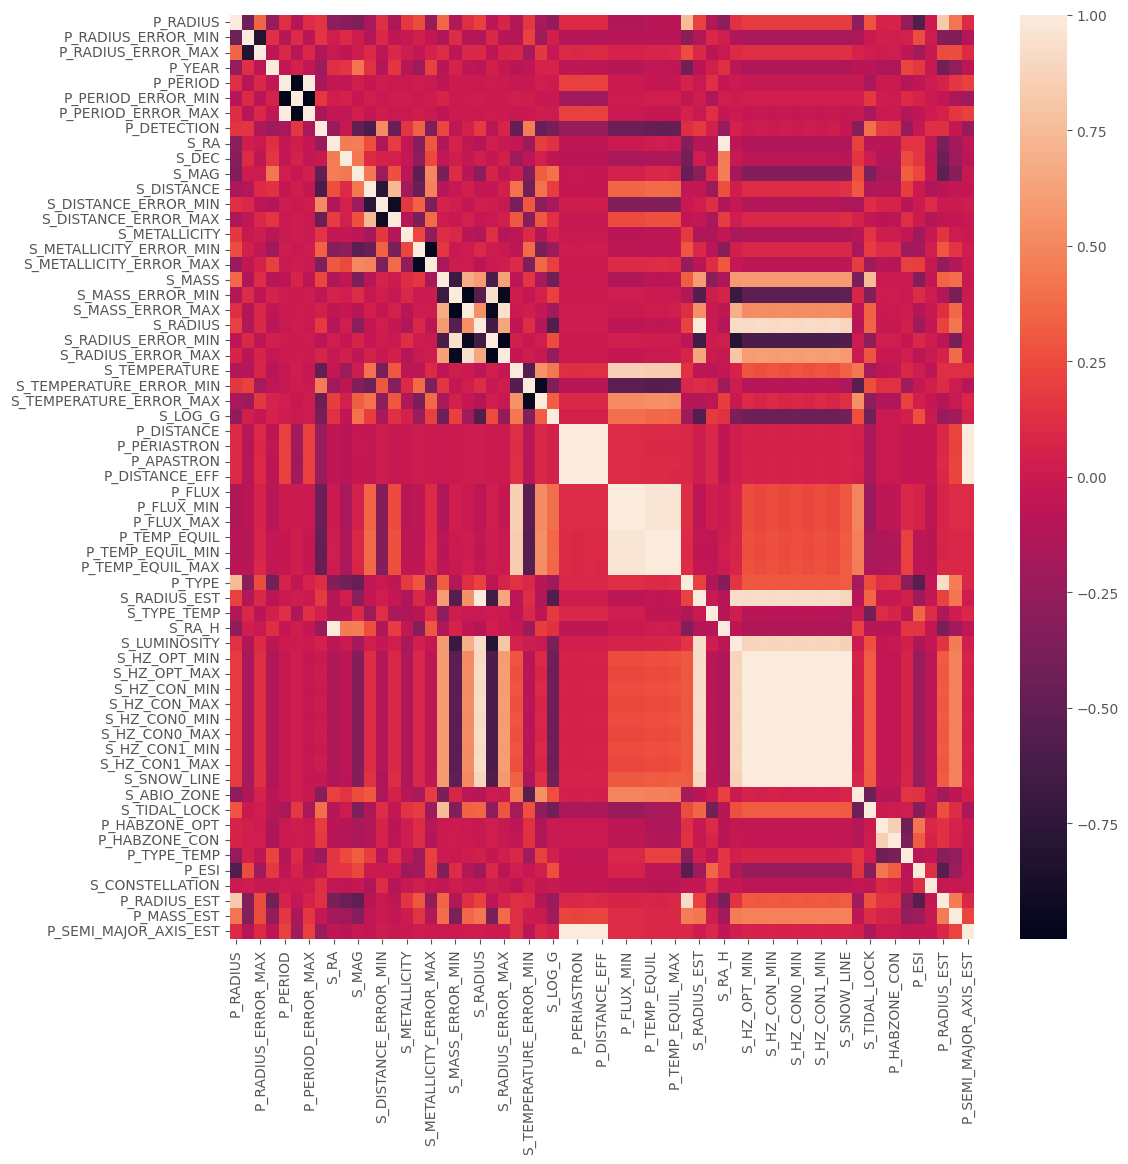

In [30]:
plt.figure(figsize=(12, 12))
X_train_corr = X_train.corr()
sns.heatmap(X_train_corr, annot=False)

In [31]:
X_train.corr().columns

Index(['P_RADIUS', 'P_RADIUS_ERROR_MIN', 'P_RADIUS_ERROR_MAX', 'P_YEAR',
       'P_PERIOD', 'P_PERIOD_ERROR_MIN', 'P_PERIOD_ERROR_MAX', 'P_DETECTION',
       'S_RA', 'S_DEC', 'S_MAG', 'S_DISTANCE', 'S_DISTANCE_ERROR_MIN',
       'S_DISTANCE_ERROR_MAX', 'S_METALLICITY', 'S_METALLICITY_ERROR_MIN',
       'S_METALLICITY_ERROR_MAX', 'S_MASS', 'S_MASS_ERROR_MIN',
       'S_MASS_ERROR_MAX', 'S_RADIUS', 'S_RADIUS_ERROR_MIN',
       'S_RADIUS_ERROR_MAX', 'S_TEMPERATURE', 'S_TEMPERATURE_ERROR_MIN',
       'S_TEMPERATURE_ERROR_MAX', 'S_LOG_G', 'P_DISTANCE', 'P_PERIASTRON',
       'P_APASTRON', 'P_DISTANCE_EFF', 'P_FLUX', 'P_FLUX_MIN', 'P_FLUX_MAX',
       'P_TEMP_EQUIL', 'P_TEMP_EQUIL_MIN', 'P_TEMP_EQUIL_MAX', 'P_TYPE',
       'S_RADIUS_EST', 'S_TYPE_TEMP', 'S_RA_H', 'S_LUMINOSITY', 'S_HZ_OPT_MIN',
       'S_HZ_OPT_MAX', 'S_HZ_CON_MIN', 'S_HZ_CON_MAX', 'S_HZ_CON0_MIN',
       'S_HZ_CON0_MAX', 'S_HZ_CON1_MIN', 'S_HZ_CON1_MAX', 'S_SNOW_LINE',
       'S_ABIO_ZONE', 'S_TIDAL_LOCK', 'P_HABZONE_OPT', 

In [32]:
def drop_correlated_cols(X_train, X_test):

  upper = X_train.corr().where(np.triu(np.ones(X_train.corr().shape), k=1).astype(bool))

  to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
  X_train.drop(to_drop, axis=1, inplace=True)
  X_test.drop(to_drop, axis=1, inplace=True)

  return

  drop_correlated_cols(X_train, X_test)

#Modeling

In [33]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process.kernels import RBF
from sklearn.preprocessing import StandardScaler

import xgboost as xgb
import lightgbm as lgbm

from sklearn.metrics import classification_report, roc_auc_score

function that can oversample train set

In [34]:
from sklearn.utils import resample

def oversample(X_train, y_train):

  train = X_train
  train['P_HABITABLE'] = y_train

  no = train[train.P_HABITABLE == 0]
  yes_cons = train[train.P_HABITABLE == 1]
  yes_opti = train[train.P_HABITABLE == 2]

  yes_cons_oversampled = resample(yes_cons, replace=True, n_samples=len(no))
  oversampled_df = pd.concat([no, yes_cons_oversampled])
  yes_opti_oversampled = resample(yes_opti, replace=True, n_samples=len(no))
  oversampled_df = pd.concat([oversampled_df, yes_opti_oversampled])

  y_train = oversampled_df['P_HABITABLE']
  X_train = oversampled_df.drop(columns=['P_HABITABLE'], axis=1)

  return X_train, y_train

#performs worse for some reason?
#X_train, y_train = oversample(X_train, y_train)
#y_train.value_counts(sort=False).sort_index().plot(kind='bar', title='Target Counts')

models to use

In [35]:
names = [
  #"Logistic Regression"
  "KNearest Neighbors",
  "Linear SVM",
  #"RBF SVM",
  "Random Forest",
  "Neural Net",
  "AdaBoost",
  "XGBoost",
  "LightGBM"
]

classifiers = [
  #LogisticRegression(),
  KNeighborsClassifier(2),
  SVC(kernel="linear",
      C=0.025),
  #SVC(gamma=2,
  #    C=1),
  RandomForestClassifier(max_depth=8,
                         n_estimators=100,
                         min_samples_leaf=1,
                         max_features='sqrt'),
  MLPClassifier(alpha=1,
                max_iter=1000),
  AdaBoostClassifier(),
  xgb.XGBClassifier(colsample_bytree=0.6,
                    gamma=0.01, #min loss required to make further partition on leaf node of tree
                    learning_rate=0.05,
                    max_depth=3,
                    min_child_weight=1.5,
                    n_estimators=1000,
                    reg_alpha=0.4, #L1 Regularization
                    reg_lambda=0.8, #L2 Regularization
                    subsample=0.8, #sample ratio
                    nthread=-1),
  lgbm.LGBMClassifier(objective='classification',
                     num_leaves=5,
                     learning_rate=0.05,
                     n_estimators=1000,
                     max_bin=55,
                     bagging_fraction=0.8,
                     bagging_freq=5,
                     feature_fraction=0.2319,
                     min_data_in_leaf=1,
                     min_sum_hessian_in_leaf=11)
]

#Predictions and Evaluation

In [36]:
for name, clf in zip(names, classifiers):

  clf = Pipeline([('scaler', StandardScaler()), (name, clf)])
  clf.fit(X_train, y_train)

  target_names = ['Inhabitable', 'Conservatively Habitable', 'Optimistically Habitable']

  y_pred = clf.predict(X_test)
  print('Model: ', name)
  print(classification_report(y_test, y_pred, target_names=target_names))

  #confusion matrix
  """
  cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
  disp.plot()
  plt.show()
  """

  #ovr roc auc
  #y_score = clf.predict_proba(X_test)[:,1]
  #print('roc_auc', roc_auc_score(y_test, y_score, multiclass='ovr'))

  print('\n')

Model:  KNearest Neighbors
                          precision    recall  f1-score   support

             Inhabitable       1.00      1.00      1.00       999
Conservatively Habitable       0.71      0.83      0.77         6
Optimistically Habitable       1.00      0.43      0.60         7

                accuracy                           1.00      1012
               macro avg       0.90      0.75      0.79      1012
            weighted avg       1.00      1.00      0.99      1012



Model:  Linear SVM
                          precision    recall  f1-score   support

             Inhabitable       1.00      1.00      1.00       999
Conservatively Habitable       1.00      0.67      0.80         6
Optimistically Habitable       0.67      0.86      0.75         7

                accuracy                           1.00      1012
               macro avg       0.89      0.84      0.85      1012
            weighted avg       1.00      1.00      1.00      1012



Model:  Random Fores

In [37]:
#TOTRY:

"""
Feature Selection using Information Gain, RF Feature importance, Chi-squared test, Fisher Score
KFold cross validation not sure if imbalance will be a problem for this
Grid/Random Search Hyperparameters
Custom Evaluation ROC/AUC with OVR
"""

'\nFeature Selection using Information Gain, RF Feature importance, Chi-squared test, Fisher Score\nKFold cross validation not sure if imbalance will be a problem for this\nGrid/Random Search Hyperparameters\nCustom Evaluation ROC/AUC with OVR\n'